# Exercise Set 5: Unsupervised learning & Text as data

In this exercise set, we will be looking at:

1. Unsupervised learning, focusing on the canonical `Principal Component Analysis` and `K-means` for dimensionality reduction and clustering, respectively
2. Text as data, focusing on `VADER` and `bag-of-words` models

The focus in the first part is implementing the methods using `sklearn` and then how we can use and evaluate these methods. In the second part, we see how we can use text as both unsupervised input to dictionary based methods, but also how the more general `bag-of-words` models allow us to use text as regular tabular input.

# Unsupervised learning

The dataset we will be looking at this time is the *UCI ML Wine recognition dataset*. This features analysis of 178 wines from three different wine manufacturers, and as it is often used you will be able to find examples analyzing this online. Furthermore, this entails that we have a ground truth for our clustering algorithms, which is nice to know when getting started with clustering. As last time, you're welcome to use a dataset of your own.

**Load data**

Here we load our input data into a `DataFrame` called `X` and our target data into a `Series`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

# Get wine data
data_wine = load_wine(as_frame=True)
X = data_wine.data
y = data_wine.target

Here we describe the data using both the documentation which came with the data, but also by computing summary statistics for the input data and value counts for the target. 

Consider whether the input features are measured on the same scale and whether the classes heavily skewed.

In [2]:
print(data_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

## Dimensionality reduction

As we saw, the data has 13 dimensions, and the goal of this section is to reduce this to a lower amount of dimensions. 

This can be done for many reasons, including:

- Reduce computation time
- Performance increases
- Visualization

This we will do using principal component analysis. All the same things regarding data leakage from train to test data carries over from supervised learning, but we will disregard this aspect and use all data at once for simplicity. Later on, it can be used in a step in your pipelines, and it will only learn from the train data.

> **Exercise 1.1**
> 
> Fill in the missing code to perform a principal component analysis using `sklearn`
>
> *Hints:*
>> Were all the variables on the same scale?

In [ ]:
from sklearn.preprocessing import # FILL IN
from sklearn.decomposition import # FILL IN

# Step one
sc = # FILL IN
sc.fit(X)
X_std = sc.transform(X)

# Step two
pca = # FILL IN
pca.fit(X_std)
X_pca = pca.transform(X_std)



In [5]:
### BEGIN SOLUTION

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# PCA
pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

### END SOLUTION

> **Exercise 1.2**
> 
> 1. What are the dimensions of `X_pca`? 
> 2. Have you reduced the dimensionality?
>
> **Hints:**
>> The shape of an array can be determined using `.shape`

In [ ]:
# Your code

In [6]:
### BEGIN SOLUTION

X_pca.shape

# 13 columns -- we haven't reduced the dimensionality, merely rotated!
# This happens when we don't specify the amount of principal components

### END SOLUTION

(178, 13)

> **Exercise 1.3**
> 
> Plot the two first principal components in a scatter plot by filling in the missing code
>
> **Hints:**
>> When subsetting arrays, the first input determines the rows and the second determines columns
>>
>> The two inputs are separated by a comma
>> 
>> The input `:` corresponds to all
>>
>> Python is zero-index, i.e. `0` corresponds to the first element

In [ ]:
# Plot
plt.scatter(X_pca[FILL IN], X_pca[FILL IN]) # Missing code
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

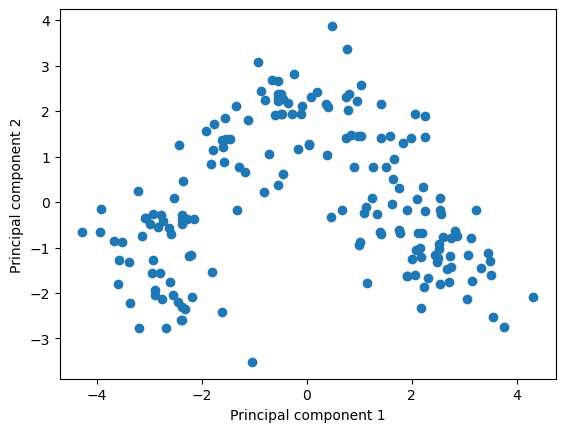

In [7]:
### BEGIN SOLUTION

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

### END SOLUTION

> **Exercise 1.4**
> 
> Reuse the code from before, but add colors by adding the option `c = y` to the scatter plot.
> Can we see a difference between the three wine cultivators?
>
> **Hints:**
>> This colors the plot according to the class of the observation

In [ ]:
# Your code

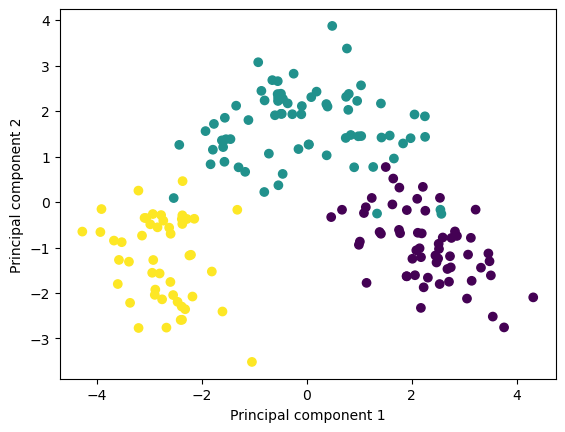

In [8]:
### BEGIN SOLUTION

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

### END SOLUTION

Now we have chosen two dimensions for visualisation, but sometimes we might want to make a more informed choice about the amount of dimensions based on the variance kept or lost. This information can be obtained using a scree plot.

To create the scree plot, we need to calculate the explained variance ratio for each principal component.

Implementing stuff on your own might cause entail minor bugs and errors. Perhaps `sklearn` has an implementation for us?

> **Exercise 1.5**
> 
> Look at the documentation for the [PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 
> - Does it have a feature/attribute which calculates it for us? 
> - How would we access this feature?
>
> **Hints:**
>> Look under *Attributes*

In [ ]:
### BEGIN SOLUTION

# It does and it's called `explained_variance_ratio_`.

# We access it using a period (`.`). For an instance called `pca`, it would thus become `pca.explained_variance_ratio_`

### END SOLUTION

> **Exercise 1.6**
> 1. Extract the explained variance ratio
> 2. Calculate the cumulative explained variance ratio
> 
> Hints: 
>> Attributes can be accessed using a period (`.`)
>>
>> `numpy` has a function for calculating cumulative sums

In [ ]:
# Your code

In [9]:
### BEGIN SOLUTION

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

### END SOLUTION

> **Exercise 1.7**
> 
> Create a scree plot using the code below, inserting the appropriate x and y variables
> 
> Hints: 
>> `PC_values` is an array that goes from `1` to `13`, which corresponds to the amount of principal components

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.bar(FILL IN)
plt.step(FILL IN)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

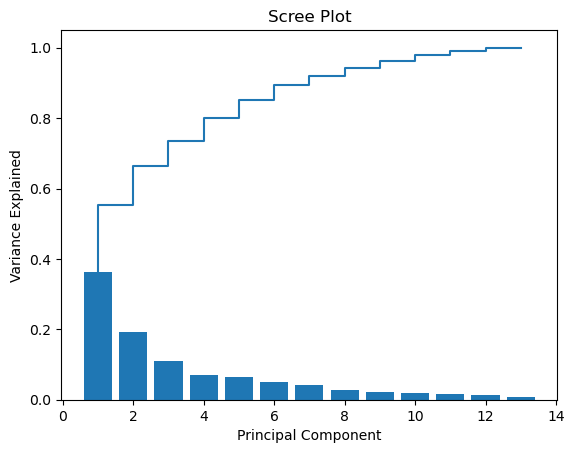

In [10]:
## BEGIN SOLUTION

PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, var_exp)
plt.step(PC_values, cum_var_exp)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### END SOLUTION

There are many ways to decide on the amount of dimensions, most often through cross validation, compute constraints, or a heuristic such as the elbow method.

However, as we are going to continue to plotting the data in a 2-dimensional space, we only need two principal components.

It seems superfluous to return all the principal components, doesn't it?

> **Exercise 1.8**
> 
> Change the code from exercise 1.1 to only return the first two components
> 
> Call the transformed data `X_pca_2`
> 
> Hints: 
>> `PCA` has an input which decides the amount of components.

In [ ]:
# Your code

In [12]:
### BEGIN SOLUTION

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# PCA
pca_2 = PCA(n_components=2)
pca_2.fit(X_std)
X_pca_2 = pca_2.transform(X_std)

### END SOLUTION

## Clustering

Having now performed dimensionality reduction, we will use the `K-means` algorithm to cluster the data. In this case, we know that three classes exist, but `K-means` will not use this information.

First we implement the method, and then we continue to look at how one can evaluate the method and choose the amount of clusters.

There are many other clustering methods, and if you want to use other methods, a starting point could be the [clustering section in sklearn](https://scikit-learn.org/stable/modules/clustering.html).

> **Exercise 2.1**
> 
> Fill in the missing code such that you implement a `K-means` clustering algorithm with three clusters.
> For replicability, you should also set a random state


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import 

# fit the pca and get the two first components
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)

# apply the 
kmeans = FILL IN
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

In [13]:
### BEGIN SOLUTION

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# fit the pca and get the two first components
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)

# apply the 
kmeans = KMeans(n_clusters=3, random_state=73)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

## END SOLUTION

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The code below visualizes the found clusters from the previous exercise.

> **Exercise 2.2**
> 
> Explain the code by filling in the missing comments, one at each `#`


In [ ]:
#
X_kmeans = pd.DataFrame(X_pca)
X_kmeans['cluster_id'] = y_kmeans

#
unique_cluster_ids = X_kmeans['cluster_id'].unique()

#
for cluster_id in unique_cluster_ids:
    #
    cluster_subset = X_kmeans.loc[X_kmeans.cluster_id == cluster_id]
    #
    plt.scatter(cluster_subset[0], cluster_subset[1])
    
#
centroids = kmeans.cluster_centers_

#
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=80)
plt.show()

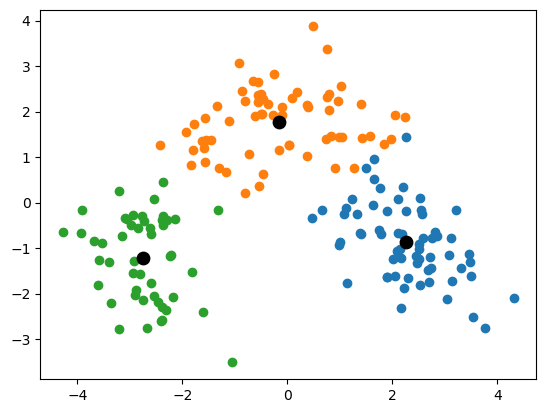

In [14]:
### BEGIN SOLUTION

# Create a DataFrame with three columns, i.e. the two principal components and the cluster id 
X_kmeans = pd.DataFrame(X_pca)
X_kmeans['cluster_id'] = y_kmeans

# Get the unique cluster label
unique_cluster_ids = X_kmeans['cluster_id'].unique()

# For each unique cluster label
for cluster_id in unique_cluster_ids:
    # Subset the observations in the cluster
    cluster_subset = X_kmeans.loc[X_kmeans.cluster_id == cluster_id]
    # Plot the two principal components in a scatterplot
    plt.scatter(cluster_subset[0], cluster_subset[1])
    
# Extract the centroids
centroids = kmeans.cluster_centers_

# Plot the centroids
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=80)
plt.show()

### END SOLUTION

So far we have chosen three dimensions because I told you to, but usually you would have to decide upon this yourself, a downside of `K-means`. 

To assist us, we can look for elbows in what the model optimizes.

> **Exercise 2.3**
> 
> The `K-means` algorithm minimizes the sum of squared distances to the nearest centroid. 
> This is available through the `Kmeans` object. Look through the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find out how to extract this information.
> Using this knowledge, fill in the missing code to plot the sum of squared distances for 1 to 10 clusters.
>> *Hints:*
>>
>> Try looking under *Attributes*


In [ ]:
cluster_range = range(1, FILL IN)
sum_squared_distances_list = []

# For each cluster, calculate sum of squared distances
for no_clusters in cluster_range:
    kmeans = KMeans(n_clusters=no_clusters, random_state=73)
    kmeans.fit(X_pca)
    sum_squared_distances_list.append(FILL IN)


# Plot the sum of squared distances as a function of cluster range
plt.plot(cluster_range, sum_squared_distances_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

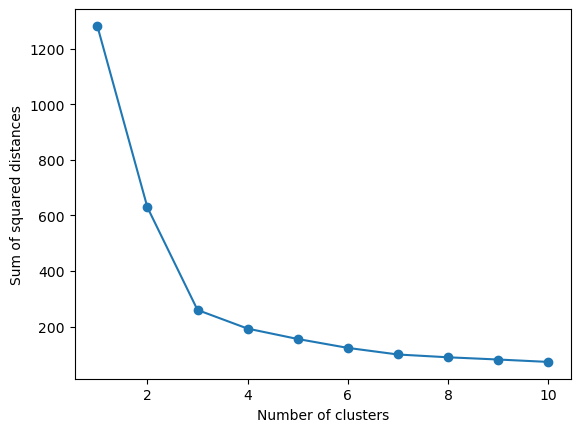

In [15]:
### BEGIN SOLUTION

cluster_range = range(1, 11)
sum_squared_distances_list = []

# For each cluster, calculate sum of squared distances
for no_clusters in cluster_range:
    kmeans = KMeans(n_clusters=no_clusters, random_state=73)
    kmeans.fit(X_pca)
    sum_squared_distances_list.append(kmeans.inertia_)


# Plot the sum of squared distances as a function of cluster range
plt.plot(cluster_range, sum_squared_distances_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

### END SOLUTION

However, there are many different metrics to evaluate a clustering algorithm. A list of those implemented in `sklearn` can be found in their [user guide](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation), which also includes pros and cons of each metric. 

> **Exercise 2.4**
> 
> The code below calculates the average silhoutte coefficient, see [documentation here](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient).
>
> 1. What is the range of values, and what values are preferred? 
> 2. Should one be wary of using this method to compare across models from the three broad categories introduced in the lecture?
>> *Hints:*
>>
>> Think about convexity


In [16]:
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=3, random_state=73)
cluster_labels = clusterer.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Average silhouette coefficient: {silhouette_avg:.2f}")

Average silhouette coefficient: 0.56


c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Having now seen how to calculate the silhouette coefficient, we want to look at how it varies with up to ten clusters

> **Exercise 2.5**
> 
> Fill in the missing code to calculate the average silhouette coefficients
>
>> *Hints:*
>>
>> How many clusters are needed to calculate the silhouette coefficient?

In [ ]:
from sklearn.metrics import silhouette_score

# Specify range of clusters
cluster_range_silhouette = range(FILL IN)
avg_silhouette_list = []

# Calculate the average silhouette coefficient
for no_clusters in cluster_range_silhouette:
    kmeans = KMeans(n_clusters=no_clusters, random_state=73)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    avg_silhouette_list.append(silhouette_avg)

# Plot average silhouette coefficients
plt.plot(FILL IN, FILL IN, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette coefficient')
plt.show()

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

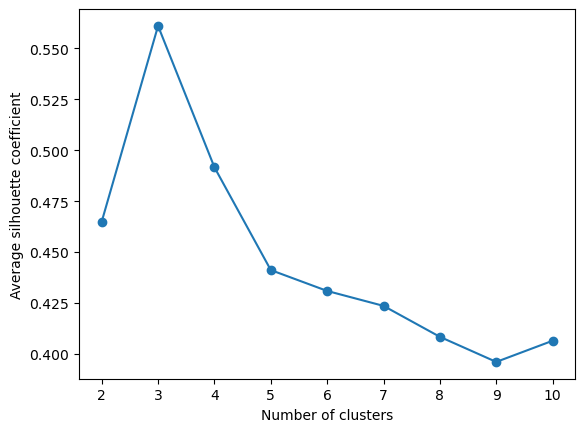

In [17]:
### BEGIN SOLUTION

from sklearn.metrics import silhouette_score

# We need atleast two clusters, as we need a cluster and a nearest neighbor cluster
# Specify range of clusters 
cluster_range_silhouette = range(2, 11)
avg_silhouette_list = []

# Calculate the average silhouette coefficient
for no_clusters in cluster_range_silhouette:
    kmeans = KMeans(n_clusters=no_clusters, random_state=73)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    avg_silhouette_list.append(silhouette_avg)

# Plot average silhouette coefficients
plt.plot(cluster_range_silhouette, avg_silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette coefficient')
plt.show()

### END SOLUTION

We can also make silhouette plots, although they are a bit tedious to produce. Code to produce it using just `sklearn` can be found online, but there also exist packages to do it for us! `yellowbrick` is one such package, and it even uses the same syntax as `sklearn`. As a general rule, it's always a good idea to check if there exists a package which does what you want to do, ideally before you spend too much time implementing stuff.

> **Exercise 2.6**
> 
> Install the package `yellowbrick` to plot the silhoutte plot using the code below. 
>
> Bonus: Try plotting different amounts of cluster amounts. Which amount do you prefer?
>
>> *Hints:*
>>
>> Installing with `pip` follows standard naming conventions, but otherwise installation instructions can be found on their website

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


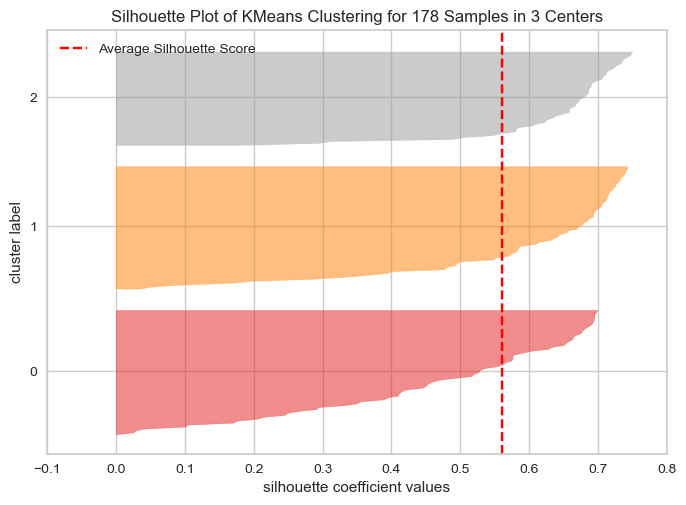

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

# Model we want to evaluate
kmeans = KMeans(n_clusters=3, random_state=73)

# The vizualiser
visualizer = SilhouetteVisualizer(kmeans)

# Fit the data to the visualizer
visualizer.fit(X_pca)       

# Show the plot
visualizer.show()  
plt.show()

# Text as data

The dataset we will be looking at to get used to working with text as data is [IMDB Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) downloaded from Kaggle, but originally from [Stanford](http://ai.stanford.edu/~amaas/data/sentiment/)
and created for the paper *Maas, Andrew, et al. "Learning word vectors for sentiment analysis." Proceedings of the 49th annual meeting of the association for computational linguistics: Human language technologies. 2011.*

The dataset consists of 50.000 movie reviews, which are humanly classified as either positive or negative (25.000 of each).

**Load data**

Here we load our data into a `DataFrame` called `df`. Furthermore, we map the classes into a binary vector which indicates whether the review was positive (`1`) or negative (`0`). 

In [39]:
# Import data
df = pd.read_csv('movie_data.csv.zip', encoding='utf-8', compression='zip')
df['positive'] = df['sentiment'].map({'positive':1,'negative':0})

A sensible first thing to do is to read some of the text. The code below does enables you to do this, printing the first two positive and negative reviews. 

> **Exercise 3.1**
> 
> Are there any weird artifacts in the text? If there are any, can you guess why they're there?

In [40]:
print("Positive")
print()
for i in df.loc[df.sentiment == 'positive'].review[:2]:
    print(i)
    print()

print("Negative")
print()
for i in df.loc[df.sentiment == 'negative'].review[:2]:
    print(i)
    print()

Positive

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

Having a dataset with labels is not always easy. If we had no labels but were still interested in the sentiment of the reviews, one way to go about this would be using a dictionary based method. 

In this example, we will use the `VADER` sentiment analyser to get the sentiment of the reviews.

> **Exercise 3.2**
> 
> Explain what happens in each of the four steps by commenting the code. 
>
>> *Hints:*
>>
>> `.apply` applies a function to the column
>>
>> `lambda` functions are anonymous function which are defined inplace. In this situation, they are applied to each row in the column.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#
sia = SentimentIntensityAnalyzer()

#
df['scores'] = df['review'].apply(lambda review: sia.polarity_scores(review))

#
df['compound'] = df['scores'].apply(lambda scores: scores['compound'])

#
df['comp_score'] = df['compound'].apply(lambda comp_score: 1 if comp_score >= 0 else 0)

In [41]:
### BEGIN SOLUTION

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create instance
sia = SentimentIntensityAnalyzer()

# Calculate the scores
df['scores'] = df['review'].apply(lambda review: sia.polarity_scores(review))

# Extract the compound score (-1 to 1)
df['compound'] = df['scores'].apply(lambda scores: scores['compound'])

# Turn it into a binary variable signalling positive (1) or negative (0)
df['comp_score'] = df['compound'].apply(lambda comp_score: 1 if comp_score >= 0 else 0)

As we are so lucky to have a labelled dataset, we can see how our unsupervised method did!

> **Exercise 3.3**
> 
> Calculate the accuracy of the predicted `comp_score` (compound scores)
>> *Hints:*
>>
>> Try importing `accuracy_score` from `sklearn.metrics`

In [ ]:
# Your code

In [22]:
### BEGIN SOLUTION

from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(df['positive'], df['comp_score']):.2f}")

### END SOLUTION

Accuracy: 0.70


`VADER` is relatively advanced, and uses information about whether the text is capitalized and uses exclamation marks. However, for `bag-of-words` models and other text models, it is common to preprocess the data to reduce the complexity. 

In the following code, I give you some examples of how one could preprocess the data. One of the common tools used is Regular Expressions, shortened `re`. I do not expect you to know it, but it's a neat tool for capturing text and either storing it or replacing it with other text. You can play around with it at [RegExr.com](https://regexr.com/), should you wish. 

> **Exercise 3.4**
> 
> Look at the reviews after each cleaning example. What's the difference between the two preprocessing methods? Is the text better represented than before we preprocessed it?
> Some things you could consider:
> - Does it make the text more readable for you? What about for an algorithm?  
> - Have we removed the weird artifacts you (perhaps) found earlier?
> - Have we introduced any new weird artifacts?

In [23]:
import re

# Clean reviews
def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'<[^>]*>', ' ', document) #Remove HTML
    document = re.sub(r'[^\w\s]','', document) #Remove non-alphanumeric characters
    return document

df['review_clean'] = df['review'].apply(cleaner)

In [24]:
print("Positive")
print()
for i in df.loc[df.sentiment == 'positive'].review_clean[:2]:
    print(i)
    print()

print("Negative")
print()
for i in df.loc[df.sentiment == 'negative'].review_clean[:2]:
    print(i)
    print()

Positive

one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forge

In [25]:
# Import stopwords
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

# Extended cleaning function
def extended_cleaner(document, stopwords_list = english_stopwords):
    document = document.lower() # To lower case
    document = re.sub(r'<[^>]*>', ' ', document) # Remove HTML
    document = re.sub(r'[^\w\s]','', document) # Remove non-alphanumeric characters
    text = ' '.join(x for x in document.split(' ') if x not in stopwords_list) # Remove stopwords
    return text

df['review_extended_clean'] = df['review'].apply(extended_cleaner)# Clean reviews

In [26]:
print("Positive")
print()
for i in df.loc[df.sentiment == 'positive'].review_extended_clean[:2]:
    print(i)
    print()

print("Negative")
print()
for i in df.loc[df.sentiment == 'negative'].review_extended_clean[:2]:
    print(i)
    print()

Positive

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened  first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word  called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away  would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered midd

In [ ]:
### BEGIN SOLUTION

# The difference is whether we remove stopwords
# It becomes less readable for me (expect removing the linebreaks <br />), 
# but for algorithms it removes a lot of extra details (stopwords, exclamation marks etc.) 
# and keeps only the most important information. 
# However, it also introduces something which could be considered mistakes, i.e. introducing the word oldtimebbc from old-time-bbc
# Generally, it's always up for interpretation what's right and what's wrong

### END SOLUTION

Having now preprocessed the text, we want to implement a `bag-of-words` model.

> **Exercise 3.5**
> 
> Implement a model that count the amount of unique words in each sentence by filling in the missing code
>> *Hints:*
>>
>> Try importing `CountVectorizer`
>>
>> It has a method which both fits and transforms the data in one go.

In [ ]:
from sklearn.feature_extraction.text import FILL IN

vectorizer = FILL IN

X = df.review_extended_clean

X_bag = FILL IN

In [27]:
### BEGIN SOLUTION

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = df.review_extended_clean

X_bag = vectorizer.fit_transform(X)

### END SOLUTION

> **Exercise 3.6**
> 
> We have now vectorized the text, and have a variable called `X_bag`.
>
> 1. What is the type of `X_bag`?
> 2. What is the dimensionality of `X_bag`?
> 3. Could we use simple unregularized linear regression with this input?
> 
>> *Hints:*
>>
>> How many samples compared to variables do we have?
>>

In [ ]:
# Your code

In [28]:
### BEGIN SOLUTION

print(X_bag.shape)
print(type(X_bag))

# It's a sparse matrix
# They're very efficient -- if you ever convert it into a dense matrix and put it into a LogisticRegression, it's going to run forever.
# Dimensions (50000, 167125), i.e. n < p and OLS does not work due to it not being invertible 

### END SOLUTION

(50000, 167125)
<class 'scipy.sparse._csr.csr_matrix'>


Having now seen the workings of the `CountVectorizer`, we're going to implement it in a pipeline so it can be used for supervised learning as we have seen whilst avoiding data leakage. We do not perform cross validation to reduce the time it takes to run.

> **Exercise 3.7**
> 
> Fill in the missing code such that we implement a `CountVectorizer` followed by a `LogisticRegression`.
>
> Does it perform better than `VADER`?
>> *Hints:*
>> 
>> We have previously looked at pipelines and datasplitting. Try looking at last sessions exercises.



In [29]:
from sklearn.linear_model import 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = df.positive
X = df.review_extended_clean

X_train, X_test, y_train, y_test = train_test_split(FILL IN, test_size=0.3, random_state=73)


tf_clf = Pipeline([FILL IN])

tf_clf.fit(X_train, y_train)
tf_acc = tf_clf.score(X_test, y_test)
print(f"Accuracy: {tf_acc:.2f}")

SyntaxError: invalid syntax (2020955814.py, line 1)

In [34]:
### BEGIN SOLUTION

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = df.positive
X = df.review_extended_clean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)


tf_clf = Pipeline([('tf', CountVectorizer()),
                     ('clf', LogisticRegression()),])

tf_clf.fit(X_train, y_train)
tf_acc = tf_clf.score(X_test, y_test)
print(f"Accuracy: {tf_acc:.2f}")

### END SOLUTION

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.89


> **Exercise 3.8**
> 
> Change the vectorizer from the previous exercise to a tf-idf vectorizer followed by a `LogisticRegression`.
>
> Does the model perform better?
>> *Hints:*
>> 
>> Try googling `sklearn tfidf`


In [ ]:
# Your code

In [35]:
### BEGIN SOLUTION

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


tfidf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])

tfidf_clf.fit(X_train, y_train)

tfidf_acc = tfidf_clf.score(X_test, y_test)
print(f"Accuracy: {tfidf_acc:.2f}")

# Slightly better, but not by much! Could be random chance

### END SOLUTION

Accuracy: 0.90


We have now looked at some ways of how to work with text. You could also look into:

- Stemming and lemmatization
- N-gram models (both vectorizers support it)
- Changing the minimum or maximum frequency that words need to appear with

Another model to look into that is not too computationally difficult is topic models. 

A cool application of topic models can be seen in [Transparency and Deliberation within the FOMC: A Computational Linguistics Approach](https://sekhansen.github.io/pdf_files/qje_2018.pdf), with the most information about the text analysis in section IV. 

`sklearn` has an implementation of a LDA topic model ([sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)), although it is my impression that it is most commonly done using `gensim`, see their website [here](https://radimrehurek.com/gensim/index.html#).